c:\Users\WELCOME\Downloads\python\python\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WELCOME\Downloads\python\python\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WELCOME\Downloads\python\python\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\WELCOME\Downloads\python\python\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

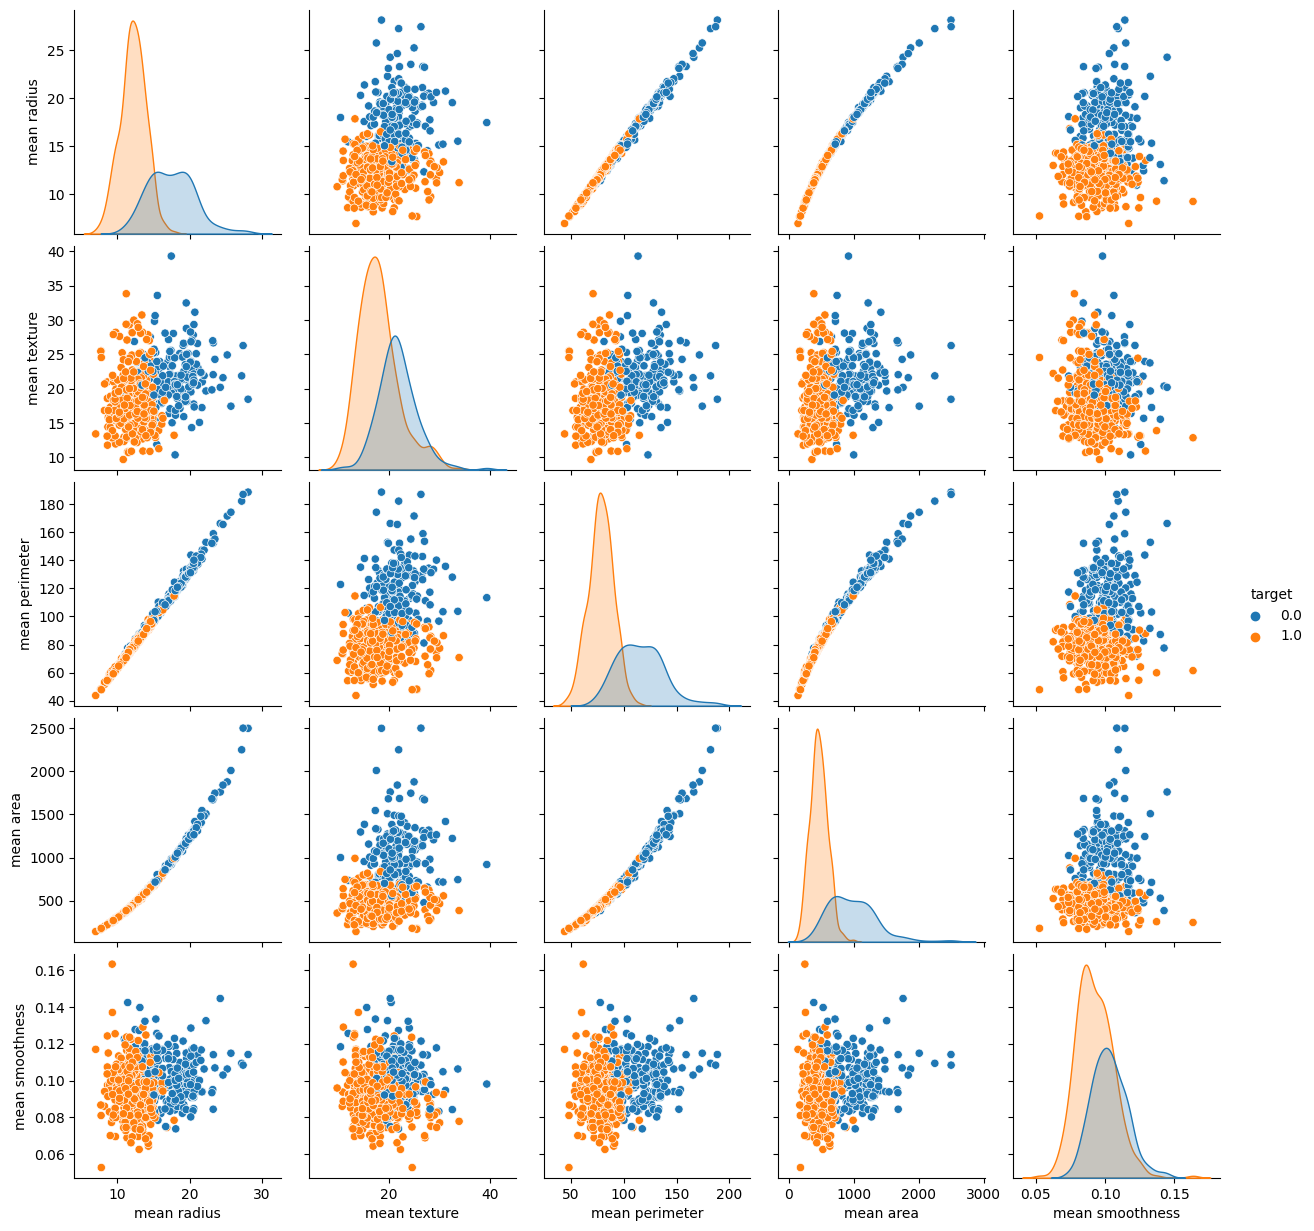

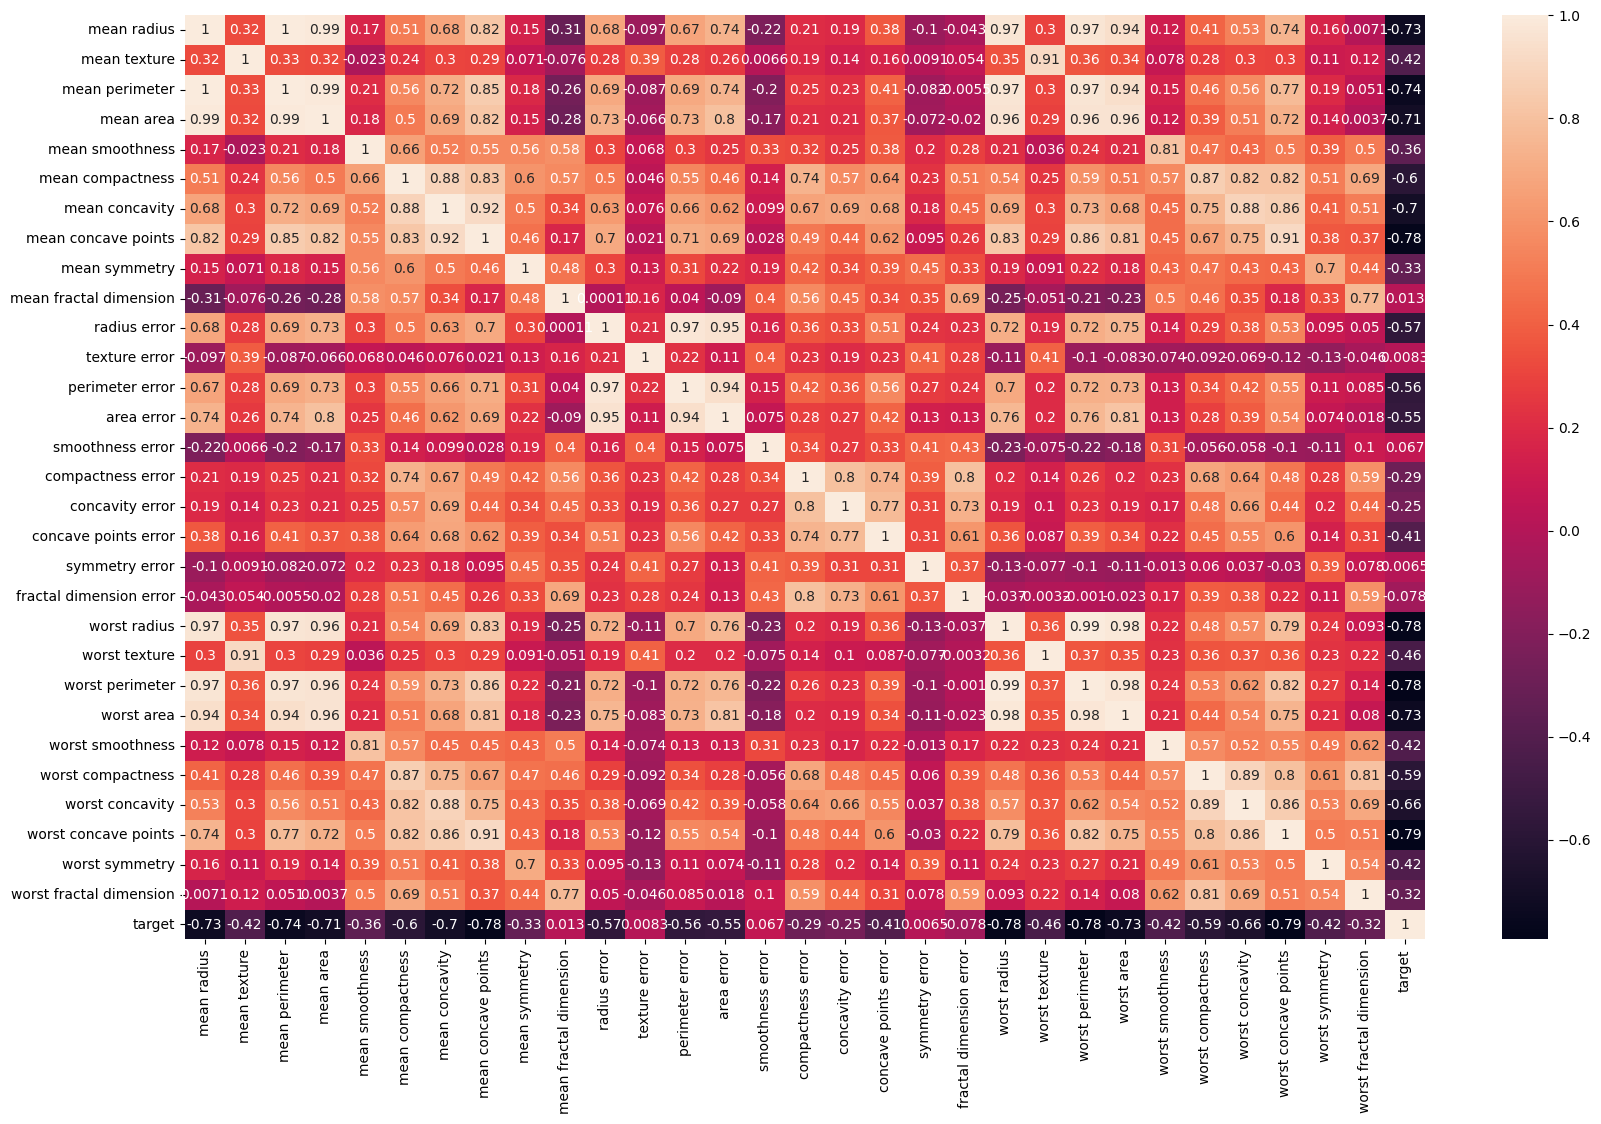

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

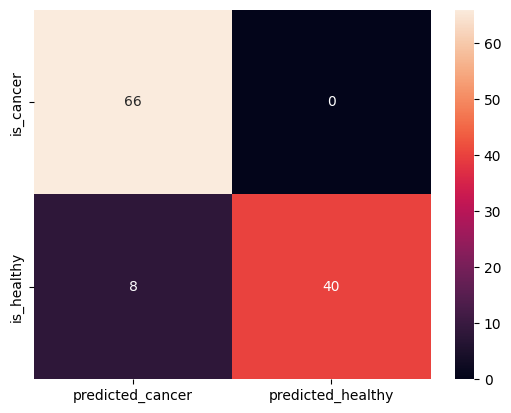

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline 
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

# Create pair plots using Seaborn
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

# Display the plots
plt.show()
plt.figure(figsize=(20,12))
sns.heatmap(df_cancer.corr(), annot=True)
plt.show()

x=df_cancer.drop(['target'], axis=1)
x.head() 
print(x.head())
y=df_cancer['target']
y.head()
print(y.head()) 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=20)
print('the size of our training "x"(input features) is', x_train.shape )
print('\n')
print('the size of our testing "x"(input features) is', x_test.shape )
print('\n')
print('the size of our training "y"(output features) is', y_train.shape )
print('\n')
print('the size of our testing "y"(output features) is', y_test.shape )
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(x_train, y_train)
y_predict= svc_model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
cm=np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion=pd.DataFrame(cm, index =['is_cancer','is_healthy'],
columns=['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion,annot=True)
print(classification_report(y_test, y_predict))
x_train_min= x_train.min()
x_train_min
x_train_max= x_train.max()
x_train_max
x_train_range = (x_train_max-x_train_min)
x_train_range
x_train_scaled= (x_train- x_train_min)/(x_train_range)
x_train_scaled.head() 
x_test_min= x_test.min()
x_test_range= (x_test- x_test_min).max()
x_test_scaled=(x_test - x_test_min)/x_test_range
svc_model= SVC()
svc_model.fit(x_train_scaled, y_train)
y_predict= svc_model.predict(x_test_scaled)
cm= confusion_matrix(y_test,y_predict)
cm= np.array(confusion_matrix(y_test,y_predict,labels=[1,0])) 
confusion=pd.DataFrame(cm,index=['is_cancer', 'is_healthy'],
columns=['predicted_cancer', 'predicted_healthy'])
confusion
print(classification_report(y_test, y_predict))
